# DATA ANALYSIS /w example codes and concepts

# Confidence Intervals


In [1]:

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Testing Hypotheses

## 1. Catching Cheaters

Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins $\$$9 from the casino if it comes up heads and loses $\$$10 if it comes up tails.

__________

Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money? Simulation of (playing twice) 10,000 times and calculation the probability based on the simulation result.

In [2]:
arr=make_array('win','lose')
result_1=make_array()
result_2=make_array()
for i in np.arange(10000):
    result_1=np.append(result_1,np.random.choice(arr))
    result_2=np.append(result_2,np.random.choice(arr))
twice=Table().with_column('1',result_1,'2',result_2)
number_of_wins=twice.where('1','win').where('2','win').num_rows
p_winning_after_two_flips = number_of_wins/10000
print(p_winning_after_two_flips)

0.2412


______________

A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, **you think that their chance of winning is higher than the normal chance of winning.**

You decide to test your hunch using the outcomes of the 20 games you observed.


**Conditions of null and alternative hypothesis**

**Null hypothesis:** There is no cheating

**Alternative hypothesis:** There are some cheating in game

_________

<div class="hide">\pagebreak</div>
Suppose I decided to use the number of wins as my test statistic.

Wrote a function called `simulate` that generates exactly one simulation of my test statistic under the Null Hypothesis.  It takes no arguments. It returns the number of wins in 20 games simulated under the assumption of Null Hypothesis.


In [3]:

def simulate():
    return sample_proportions(20,make_array(0.5,0.5)).item(0)*20

simulate()

9.0

____________

Using 10,000 trials, I generated simulated values of the number of wins in 20 games. Assign `test_statistics_under_null` to an array that stores the result of each of these trials.


In [4]:
repetitions = 10000
test_statistics_under_null = make_array()
for i in np.arange(repetitions):
    value=sample_proportions(20,make_array(0.5,0.5)).item(0)*20
    test_statistics_under_null=np.append(test_statistics_under_null,value)
test_statistics_under_null

array([12.,  9., 10., ...,  7., 13., 14.])

_________________________

Using the results from previous calculation, I generated a histogram of the empirical distribution of the number of wins in 20 games.

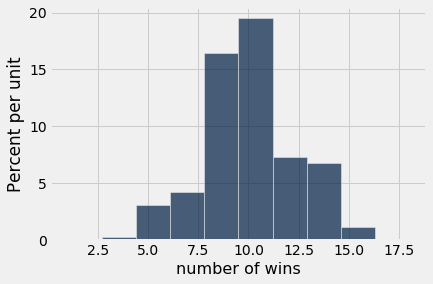

In [6]:
Table().with_column('number of wins',test_statistics_under_null).hist()

________________

<div class="hide">\pagebreak</div>

Compute an empirical P-value for this test.

*---* The values in our test statistics which are in the direction of the alternative hypothesis.

In [7]:
p_value = np.sum(test_statistics_under_null >= 10) / repetitions
print(p_value)

0.5909


________________

**If I were to use a P-value cutoff of 1%. The conclusion of my hypothesis test would be null hypothesis because of the result can not be in 1%.**

____________

## Confidence Intervals

## 2. Plot the Vote

Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters*, or the proportion of the votes that each candidate received from the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [8]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows


______________

Below, the code uses bootstrapped samples from `votes` to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**.

In [9]:
def proportions_in_resamples():
    prop_c = make_array()
    for i in np.arange(5000):
        bootstrap = votes.sample().column(0)
        single_proportion = np.count_nonzero(bootstrap=='C') /num_votes
        prop_c = np.append(prop_c, single_proportion)
    return prop_c

In the following cell, we run the function just defined, `proportions_in_resamples`, and create a histogram of the calculated statistic for the 5,000 bootstraps

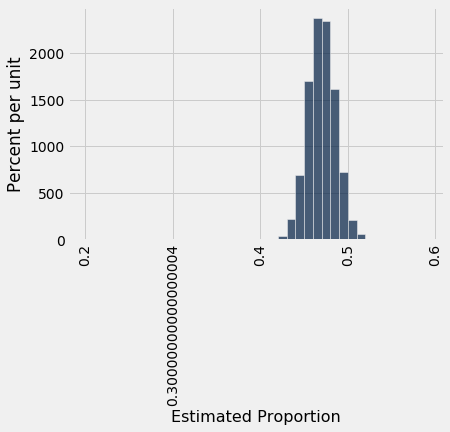

In [10]:
sampled_proportions = proportions_in_resamples()
Table().with_column('Estimated Proportion', sampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

______________

Using the array `sampled_proportions`, founding 95% confidence interval. (Computing the lower and upper ends of the interval, named `c_lower_bound` and `c_upper_bound`, respectively.)

In [11]:
c_lower_bound = percentile(2.5,sampled_proportions)
c_upper_bound = percentile(97.5,sampled_proportions)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.440000, 0.501000]


________

The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use CI's to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, I use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Ploted a histogram of the the resulting samples. Finally calculated 80% confidence interval.

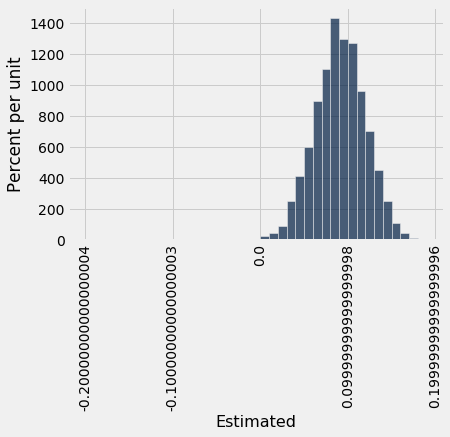

In [12]:
def leads_in_resamples():
    leads = make_array()
    for i in np.arange(5000):
        bootstrap=votes.sample().column(0)
        single=(np.count_nonzero(bootstrap=='C')-np.count_nonzero(bootstrap=='T'))/num_votes
        leads=np.append(leads,single)
    return leads

sampled_leads = leads_in_resamples()
#Plot a histogram of the the resulting samples
bins = np.arange(-0.2,0.2,0.01)
Table().with_column('Estimated',sampled_leads).hist(bins=bins)

In [13]:
diff_lower_bound = percentile(10,sampled_leads)
diff_upper_bound = percentile(90,sampled_leads)
print("Bootstrapped 80% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 80% confidence interval for Candidate C's true lead over Candidate T: [0.054000, 0.129000]
